In [4]:
import sys

# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cocpit

sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


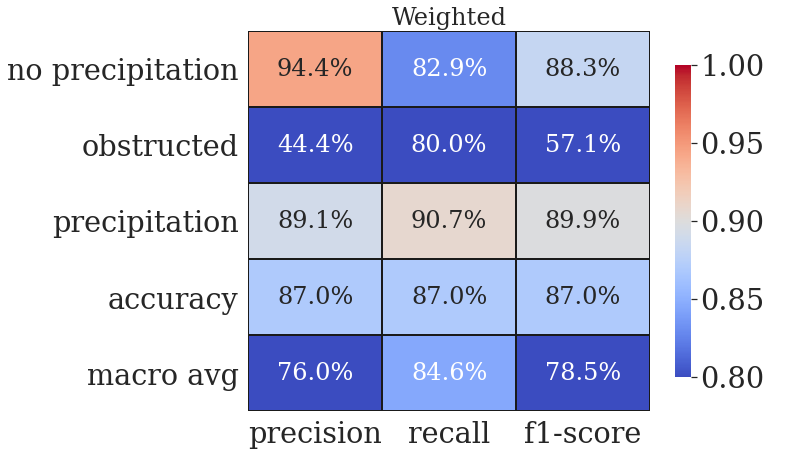

In [5]:
clf_report = pd.read_csv(
    "/ai2es/saved_accuracies/v0.0.0/clf_report_placeholder.csv",
    index_col=0,
).drop(columns=["model", "fold"])
save_name = "/ai2es/plots/weighted_classification_report_rain_gauge_2class.png"


cocpit.plotting_scripts.classification_report.classification_report_classes(
    clf_report, save_name=save_name, save_fig=False
)  